# GPT4 

In [1]:
from wla import WordLevelAligner
import os

os.environ['OPENAI_API_KEY'] = '' # your openai api key
wla = WordLevelAligner(
    model_path='openai'
)

Using OpenAI API. Make sure to use os.environ['OPENAI_API_KEY'] to set your API key.


In [2]:
from collections import defaultdict

all_results = defaultdict(list)

for to_test in [20]: # range(10, 110, 20):
    print("Testing ", to_test, "examples")
    for n in [1,2,3,4,5]:# range(1, 16, 3):
        print("Testing ", n, "shot")
        results = wla.evaluate(to_test, n)
        all_results[(to_test, n)].extend(results)
        print("Average weighted accuracy: ", sum([r[-1].weighted_accuracy for r in results])/len(results))
        print("Average F1 score: ", sum([r[-1].f1 for r in results])/len(results))

Testing  20 examples
Testing  1 shot


100%|██████████| 20/20 [00:29<00:00,  1.49s/it]


Average weighted accuracy:  0.6616964285714285
Average F1 score:  0.6441275588876209
Testing  2 shot


100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Average weighted accuracy:  0.6569444444444444
Average F1 score:  0.6533213110418992
Testing  3 shot


100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


Average weighted accuracy:  0.6790277777777778
Average F1 score:  0.6656060606060606
Testing  4 shot


100%|██████████| 20/20 [00:30<00:00,  1.52s/it]


Average weighted accuracy:  0.7198809523809524
Average F1 score:  0.6992132663088545
Testing  5 shot


100%|██████████| 20/20 [00:30<00:00,  1.52s/it]

Average weighted accuracy:  0.7403373015873016
Average F1 score:  0.7148591400429636


# Claude Sonnet 3.5

In [1]:
from wla import WordLevelAligner
import os

os.environ['ANTHROPIC_API_KEY'] = '' # your anthropic api key
wla = WordLevelAligner(
    model_path='anthropic'
)

/Users/pnadel01/Desktop/word-level-alignment/wla.py:270: SyntaxWarning: invalid escape sequence '\['
  examples = [(re.sub(r'\s+', ' ', lt.text.strip()), re.sub('\[.*?\]','', first_200[int(lt['n'])-1]).strip(), first_200[int(lt['n'])-1].strip()) for lt in line_tags[:200]]
/Users/pnadel01/Desktop/word-level-alignment/wla.py:291: SyntaxWarning: invalid escape sequence '\{'
  filled_prompt = re.sub('\{example\}', example, PROMPT)
/Users/pnadel01/Desktop/word-level-alignment/wla.py:292: SyntaxWarning: invalid escape sequence '\{'
  filled_prompt = re.sub('\{lang1\}', test[0], filled_prompt)
/Users/pnadel01/Desktop/word-level-alignment/wla.py:293: SyntaxWarning: invalid escape sequence '\{'
  filled_prompt = re.sub('\{lang2\}', test[1], filled_prompt)


Using Anthropic API. Make sure to use os.environ['ANTHROPIC_API_KEY'] to set your API key.


In [2]:
from collections import defaultdict

all_results = defaultdict(list)

for to_test in [20]: # range(10, 110, 20):
    print("Testing ", to_test, "examples")
    for n in [1,2,3,4,5]:# range(1, 16, 3):
        print("Testing ", n, "shot")
        results = wla.evaluate(to_test, n)
        all_results[(to_test, n)].extend(results)
        print("Average weighted accuracy: ", sum([r[-1].weighted_accuracy for r in results])/len(results))
        print("Average F1 score: ", sum([r[-1].f1 for r in results])/len(results))

Testing  20 examples
Testing  1 shot


100%|██████████| 20/20 [00:51<00:00,  2.55s/it]


Average weighted accuracy:  0.7627678571428571
Average F1 score:  0.7209793403620803
Testing  2 shot


100%|██████████| 20/20 [00:53<00:00,  2.66s/it]


Average weighted accuracy:  0.7901190476190476
Average F1 score:  0.7393849975274124
Testing  3 shot


100%|██████████| 20/20 [00:56<00:00,  2.82s/it]


Average weighted accuracy:  0.7925595238095238
Average F1 score:  0.745995486711431
Testing  4 shot


100%|██████████| 20/20 [00:59<00:00,  2.97s/it]


Average weighted accuracy:  0.8208928571428572
Average F1 score:  0.7721166415284062
Testing  5 shot


100%|██████████| 20/20 [00:48<00:00,  2.45s/it]

Average weighted accuracy:  0.812688492063492
Average F1 score:  0.7661005416152474


In [5]:
all_results[(20,1)][0][-1].detailed_matches

[AlignmentMatch(pred_alignment=Alignment(english='description', greek='ἄσπετον', start_idx=7, end_idx=18), gold_alignment=Alignment(english='description', greek='ἄσπετον', start_idx=7, end_idx=18), match_type=<MatchType.COMPLETE: 'complete'>, overlap_score=1.0, notes='Exact match'),
 AlignmentMatch(pred_alignment=Alignment(english='And', greek='οὐδέ', start_idx=29, end_idx=32), gold_alignment=Alignment(english='And', greek='δέ', start_idx=29, end_idx=32), match_type=<MatchType.PARTIAL: 'partial'>, overlap_score=1.0, notes="Greek text differs: 'οὐδέ' vs 'δέ'"),
 AlignmentMatch(pred_alignment=Alignment(english='any', greek='τις', start_idx=39, end_idx=42), gold_alignment=Alignment(english='any', greek='τις', start_idx=51, end_idx=54), match_type=<MatchType.COMPLETE: 'complete'>, overlap_score=1.0, notes='Exact match'),
 AlignmentMatch(pred_alignment=Alignment(english='city', greek='πόλις', start_idx=48, end_idx=52), gold_alignment=Alignment(english='city', greek='πόλις', start_idx=60, en

In [6]:
all_results[(20,1)][0][-1].unmatched_gold

[Alignment(english='not', greek='οὐ', start_idx=43, end_idx=46),
 Alignment(english='who', greek='οἵ', start_idx=110, end_idx=113),
 Alignment(english='for', greek='θεοῖσιν', start_idx=118, end_idx=121)]

In [13]:
from wla import MatchType

for i in range(1, 6):
    print("Results for ", i, "shot")
    for j, alignment in enumerate(all_results[(20, i)]):
        for m in alignment[-1].detailed_matches:
            if m.match_type == MatchType.WRONG:
                print(j, m)

Results for  1 shot
2 AlignmentMatch(pred_alignment=Alignment(english='But', greek='ἀλλὰ', start_idx=0, end_idx=3), gold_alignment=None, match_type=<MatchType.WRONG: 'wrong'>, overlap_score=0.0, notes='No match found')
2 AlignmentMatch(pred_alignment=Alignment(english='all', greek='μάλʼ', start_idx=10, end_idx=13), gold_alignment=None, match_type=<MatchType.WRONG: 'wrong'>, overlap_score=0.0, notes='No match found')
2 AlignmentMatch(pred_alignment=Alignment(english='is', greek='ἔστι', start_idx=21, end_idx=23), gold_alignment=None, match_type=<MatchType.WRONG: 'wrong'>, overlap_score=0.0, notes='No match found')
4 AlignmentMatch(pred_alignment=Alignment(english='says', greek='φησί', start_idx=3, end_idx=7), gold_alignment=None, match_type=<MatchType.WRONG: 'wrong'>, overlap_score=0.0, notes='No match found')
4 AlignmentMatch(pred_alignment=Alignment(english='that', greek='τοι', start_idx=14, end_idx=18), gold_alignment=None, match_type=<MatchType.WRONG: 'wrong'>, overlap_score=0.0, not

In [15]:
import pickle

with open("all_results_claude_113.pkl", "wb") as f:
    pickle.dump(all_results, f)

# Error Analysis

In [3]:
import spacy

nlp = spacy.load('grc_perseus_trf')

/Users/pnadel01/miniconda3/envs/wla/lib/python3.12/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/pnadel01/miniconda3/envs/wla/lib/python3.12/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/pnadel01/miniconda3/envs/wla/lib/python3.12/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/pnadel01/miniconda3/envs/wla/lib/python3.12/site-packages/spacy_transformers/layers/hf_shim.py:124: FutureWarning: You are using `torch.load` with `weights_only=Fals

In [4]:
import pickle

with open("all_results_claude_113.pkl", "rb") as f:
    all_results = pickle.load(f)

In [68]:
sum([t[-1].total_alignments for t in all_results[20,5]]) # all gold standard alingments

138

In [70]:
all_results[20,5][2]

('But[ἀλλὰ] after all[μάλ᾽], it is[ἔστι] not[οὔ] at all[πως] possible[ἔστι] that the[0] design[νόον] of aegis-holding[αἰγιόχοιο] Zeus[Διὸς]',
 'But after all[ἀλλὰ], it[0] is[it: ἔστι] not[οὔ] at all[μάλ᾽] possible[πως] that[0] the[0] design[νόον] of aegis-holding[αἰγιόχοιο] Zeus[Διὸς]',
 AlignmentScore(complete=5, partial=0, wrong=1, precision=0.5555555555555556, recall=0.7142857142857143, f1=0.6250000000000001, accuracy=0.7142857142857143, weighted_accuracy=0.7142857142857143, total_alignments=9, total_gold=7, detailed_matches=[AlignmentMatch(pred_alignment=Alignment(english='But', greek='ἀλλὰ', start_idx=0, end_idx=3), gold_alignment=None, match_type=<MatchType.WRONG: 'wrong'>, overlap_score=0.0, notes='No match found'), AlignmentMatch(pred_alignment=Alignment(english='all', greek='μάλ᾽', start_idx=16, end_idx=19), gold_alignment=Alignment(english='all', greek='μάλ᾽', start_idx=45, end_idx=48), match_type=<MatchType.COMPLETE: 'complete'>, overlap_score=1.0, notes='Exact match'), Alig

In [72]:
from wla import MatchType

wrong_partial = []
for i in range(5):
    for j, alignment in enumerate(all_results[(20, i)]):
        for m in alignment[-1].detailed_matches:
            if (m.match_type == MatchType.WRONG) or (m.match_type == MatchType.PARTIAL):
                wrong_partial.append((j, m))
                print(j, m)

0 AlignmentMatch(pred_alignment=Alignment(english='And', greek='οὐδέ', start_idx=29, end_idx=32), gold_alignment=Alignment(english='And', greek='δέ', start_idx=29, end_idx=32), match_type=<MatchType.PARTIAL: 'partial'>, overlap_score=1.0, notes="Greek text differs: 'οὐδέ' vs 'δέ'")
2 AlignmentMatch(pred_alignment=Alignment(english='But', greek='ἀλλὰ', start_idx=0, end_idx=3), gold_alignment=None, match_type=<MatchType.WRONG: 'wrong'>, overlap_score=0.0, notes='No match found')
2 AlignmentMatch(pred_alignment=Alignment(english='all', greek='μάλʼ', start_idx=10, end_idx=13), gold_alignment=None, match_type=<MatchType.WRONG: 'wrong'>, overlap_score=0.0, notes='No match found')
2 AlignmentMatch(pred_alignment=Alignment(english='is', greek='ἔστι', start_idx=21, end_idx=23), gold_alignment=None, match_type=<MatchType.WRONG: 'wrong'>, overlap_score=0.0, notes='No match found')
4 AlignmentMatch(pred_alignment=Alignment(english='says', greek='φησί', start_idx=3, end_idx=7), gold_alignment=None,

In [73]:
len(wrong_partial), wrong_partial[-1]

(64,
 (17,
  AlignmentMatch(pred_alignment=Alignment(english='cruel', greek='σχέτλιοί', start_idx=10, end_idx=15), gold_alignment=None, match_type=<MatchType.WRONG: 'wrong'>, overlap_score=0.0, notes='No match found')))

In [74]:
from collections import defaultdict
pos_counter = defaultdict(int)
pos_examples = defaultdict(list)

for w in wrong_partial:
    greek = w[1].pred_alignment.greek
    read_greek = nlp(greek)[0]
    pos_counter[read_greek.pos_] += 1
    pos_examples[read_greek.pos_].append((greek, read_greek.lemma_))

/Users/pnadel01/miniconda3/envs/wla/lib/python3.12/site-packages/thinc/shims/pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


In [75]:
pos_counter

defaultdict(int,
            {'ADV': 25,
             'AUX': 7,
             'VERB': 10,
             'DET': 11,
             'NOUN': 1,
             'ADP': 1,
             'ADJ': 5,
             'CCONJ': 2,
             'PUNCT': 2})

In [76]:
pos_examples

defaultdict(list,
            {'ADV': [('οὐδέ', 'οὐδέ'),
              ('ἀλλὰ', 'ἀλλά'),
              ('μάλʼ', 'μάλα'),
              ('τοι', 'σύ'),
              ('οἴκαδʼ', 'οἴκαδε'),
              ('ἀτὰρ', 'ἀτάρ'),
              ('ἔνθʼ', 'ἔνθα'),
              ('δʼ', 'δέ'),
              ('τε', 'τε'),
              ('οὐδέ', 'οὐδέ'),
              ('ἀλλὰ', 'ἀλλά'),
              ('ἔνθʼ', 'ἔνθα'),
              ('δʼ', 'δέ'),
              ('οὐδέ', 'οὐδέ'),
              ('ἀλλὰ', 'ἀλλά'),
              ('μάλʼ', 'μάλα'),
              ('τοι', 'σύ'),
              ('ἔνθʼ', 'ἔνθα'),
              ('οὐδέ', 'οὐδέ'),
              ('ἀλλὰ', 'ἀλλά'),
              ('μάλʼ', 'μάλα'),
              ('οὔτε', 'οὔτε'),
              ('τοι', 'σύ'),
              ('ἔνθ᾽', 'ἔνθ᾽'),
              ('δʼ', 'δέ')],
             'AUX': [('ἔστι', 'εἰμί'),
              ('ἐστε', 'εἰμί'),
              ('ἐστε', 'εἰμί'),
              ('ἔστι', 'εἰμί'),
              ('ἐστε', 'εἰμί'),
              ('ἔστι', 'εἰμί

# Synth data

In [4]:
all_results[(20, 2)]

[('beyond description[ἄσπετον]? And[οὐδέ] there is[0] not[0] any[τις] city[πόλις] of mortals[βροτῶν] nearby[ἄγχι], they who[οἵ] for[0] the[0] gods[θεοῖσιν]',
  'beyond description[ἄσπετον]? And[δέ] there is[0] not[οὐ] any[τις] city[πόλις] of mortals[βροτῶν] nearby[ἄγχι], they who[οἵ] for[θεοῖσιν] the[0] gods[θεοῖσιν]',
  AlignmentScore(complete=7, partial=1, wrong=0, precision=0.9375, recall=0.75, f1=0.8333333333333334, accuracy=0.7, weighted_accuracy=0.75, total_alignment=8, total_gold=10)),
 ('perform sacrifices[ἱερά τε ῥέζουσι] and[καὶ] desired[ἐξαίτους] hecatombs[ἑκατόμβας].',
  'perform[they: ῥέζουσι] sacrifices[ἱερά] and[καὶ] desired[ἐξαίτους] hecatombs[ἑκατόμβας].',
  AlignmentScore(complete=3, partial=0, wrong=0, precision=1.0, recall=0.75, f1=0.8571428571428571, accuracy=0.75, weighted_accuracy=0.75, total_alignment=3, total_gold=4)),
 ('But[ἀλλὰ] after all[μάλ᾽], it is[ἔστι] not[οὔ] at all[πως] possible[ἔστι] that[0] the[0] design[νόον] of[0] aegis-holding[αἰγιόχοιο] Zeus[Διὸ

## Parse anabasis sentence alignment

In [1]:
with open("anabasis_sent_align_grc/0003-001-align-full.txt") as f:
    sent_align = f.read()

print(sent_align.strip())

1.1.1
1
Θουκυδίδης Ἀθηναῖος ξυνέγραψε τὸν πόλεμον τῶν Πελοποννησίων καὶ Ἀθηναίων, ὡς ἐπολέμησαν πρὸς ἀλλήλους, ἀρξάμενος εὐθὺς καθισταμένου καὶ ἐλπίσας μέγαν τε ἔσεσθαι καὶ ἀξιολογώτατον τῶν προγεγενημένων, τεκμαιρόμενος ὅτι ἀκμάζοντές τε ᾖσαν ἐς αὐτὸν ἀμφότεροι παρασκευῇ τῇ πάσῃ καὶ τὸ ἄλλο Ἑλληνικὸν ὁρῶν ξυνιστάμενον πρὸς ἑκατέρους, τὸ μὲν εὐθύς, τὸ δὲ καὶ διανοούμενον.
Thucydides, an Athenian, compiled the history of the war between the Peloponnesians and the Athenians, as they waged war against each other. He began his account from the outset of the war, anticipating that it would be a significant and most noteworthy conflict of all those that had occurred previously, reasoning that both sides were at their peak in terms of total preparation and that he observed the rest of the Greek world aligning with one side or the other, some immediately, and some considering it.

1.1.2
2
κίνησις γὰρ αὕτη μεγίστη δὴ τοῖς Ἕλλησιν ἐγένετο καὶ μέρει τινὶ τῶν βαρβάρων, ὡς δὲ εἰπεῖν καὶ ἐπὶ πλεῖστο

In [2]:
import re
pattern = re.compile(r"(\d+\.\d+\.\d+)")
pattern.split(sent_align)[1:]

['1.1.1',
 '\n1\nΘουκυδίδης Ἀθηναῖος ξυνέγραψε τὸν πόλεμον τῶν Πελοποννησίων καὶ Ἀθηναίων, ὡς ἐπολέμησαν πρὸς ἀλλήλους, ἀρξάμενος εὐθὺς καθισταμένου καὶ ἐλπίσας μέγαν τε ἔσεσθαι καὶ ἀξιολογώτατον τῶν προγεγενημένων, τεκμαιρόμενος ὅτι ἀκμάζοντές τε ᾖσαν ἐς αὐτὸν ἀμφότεροι παρασκευῇ τῇ πάσῃ καὶ τὸ ἄλλο Ἑλληνικὸν ὁρῶν ξυνιστάμενον πρὸς ἑκατέρους, τὸ μὲν εὐθύς, τὸ δὲ καὶ διανοούμενον.\nThucydides, an Athenian, compiled the history of the war between the Peloponnesians and the Athenians, as they waged war against each other. He began his account from the outset of the war, anticipating that it would be a significant and most noteworthy conflict of all those that had occurred previously, reasoning that both sides were at their peak in terms of total preparation and that he observed the rest of the Greek world aligning with one side or the other, some immediately, and some considering it.\n\n',
 '1.1.2',
 '\n2\nκίνησις γὰρ αὕτη μεγίστη δὴ τοῖς Ἕλλησιν ἐγένετο καὶ μέρει τινὶ τῶν βαρβάρων, ὡς δ

In [3]:
split_align = pattern.split(sent_align)[1:]

In [4]:
parsed_align = [(split_align[i], split_align[i+1].strip().split('\n')[-2:]) for i in range(0, len(pattern.split(sent_align)[1:]), 2)]

In [5]:
def parse_grc_alignment(fname):
    with open(fname) as f:
        sent_align = f.read()
    pattern = re.compile(r"(\d+\.\d+\.\d+)")
    split_align = pattern.split(sent_align)[1:]
    parsed_align = [(split_align[i], split_align[i+1].strip().split('\n')[-2:]) for i in range(0, len(pattern.split(sent_align)[1:]), 2)]
    return parsed_align

In [6]:
import os

alignments = {}
for fname in os.listdir("anabasis_sent_align_grc"):
    if fname.endswith(".txt"):
        alignments[fname] = parse_grc_alignment("anabasis_sent_align_grc/" + fname)

In [7]:
tot_examples = []
for k in alignments.keys():
    tot_examples.extend(alignments[k])

len(tot_examples)

24506

## Synth data creation

In [8]:
import random 

random.shuffle(tot_examples)
subset = tot_examples[:2000]

In [9]:
subset[:3]

[('6.2.28',
  ['ἐπεὶ δ’ ἐπιστρέψας ἂν καὶ ἀντιπρῴρους καταστήσας τὰς τριήρεις ἀπὸ σημείου ἀφίει ἀνθαμιλλᾶσθαι εἰς τὴν γῆν , μέγα δὴ νικητήριον ἦν τὸ πρώτους καὶ ὕδωρ λαβεῖν καὶ εἴ του ἄλλου ἐδέοντο , καὶ πρώτους ἀριστῆσαι ·',
   'then he would turn the line around again, cause the triremes to head toward the land, and start them off at a signal to race to the shore. It was counted a great prize of victory to be the first to get water or anything else they needed, and the first to get their meal.']),
 ('5.2.13',
  ['καὶ Ἀμύνταν δὲ ᾐσθανόμεθα ἀποχωροῦντά τε ἐκ τῶν πόλεων καὶ ὅσον οὐκ ἐκπεπτωκότα ἤδη ἐκ πάσης Μακεδονίας .',
   'We also had information that Amyntas was withdrawing from his cities and had already been all but driven out of all Macedonia.']),
 ('1.4.5',
  ['ὡς δ’ οὐκ ἀπεδίδρασκεν ἐκ τοῦ ἡττᾶσθαι εἰς τὸ μὴ ποιεῖν ὃ ἡττῷτο , ἀλλ’ ἐκαλινδεῖτο ἐν τῷ πειρᾶσθαι αὖθις βέλτιον ποιεῖν , ταχὺ μὲν εἰς τὸ ἴσον ἀφίκετο τῇ ἱππικῇ τοῖς ἥλιξι , ταχὺ δὲ παρῄει διὰ τὸ ἐρᾶν τοῦ ἔργου , ταχὺ δὲ

In [10]:
from wla import WordLevelAligner
import os

os.environ['ANTHROPIC_API_KEY'] = '' # your anthropic api key
wla = WordLevelAligner(
    model_path='anthropic'
)

Using Anthropic API. Make sure to use os.environ['ANTHROPIC_API_KEY'] to set your API key.


In [11]:
examples = wla.get_examples()
tests = [(s[1][0], s[1][1], '') for s in subset]

In [43]:
prompt, correct = wla.fill_prompt(examples, tests[0], 2)
print(prompt)

# Word Alignment Task
You are a helpful AI assistant uniquely skilled in aligning words between two languages. You will be given a sentence in one language and a sentence in another language. You will be asked to align the words in the two sentences. Multiple words in Language 1 may be aligned to single words in Language 2, but multiple words in Language 2 may NOT be aligned to multiple words in Language 1.
Simply return your alignment with no other comments or explanations. If you are unable to align a word, please leave it unaligned. If you are unsure about a word, please leave it unaligned.

## Example
### Language 1
πόλλʼ, ὅσʼ ἂν οὐδέ ποτε Τροίης ἐξήρατʼ Ὀδυσσεύς,
### Language 2
many things, as many as Odysseus would not have carried out for himself from Troy ever,
### Alignment
many[πόλλ᾽] things[0], as many as[ὅσ᾽] Odysseus[Ὀδυσσεύς] would[ἂν] not[οὐ] have carried out for himself[he would:ἐξήρατ᾽] from Troy[Τροίης] ever[ποτε],
### Language 1
ὥς κε μάλʼ ἀσκηθὴς σὴν πατρίδα γαῖαν ἵ

In [44]:
pred = wla.align_words(prompt)
print(pred)

Such[ταῦτα] were[0] the[τὰ] events[γενόμενα] which[0] occurred[0] in[περὶ] Sicily[Σικελίαν]


In [45]:
one_row = {"instruction":prompt, "input":"", "output":pred}
data = [one_row]
data

[{'instruction': '# Word Alignment Task\nYou are a helpful AI assistant uniquely skilled in aligning words between two languages. You will be given a sentence in one language and a sentence in another language. You will be asked to align the words in the two sentences. Multiple words in Language 1 may be aligned to single words in Language 2, but multiple words in Language 2 may NOT be aligned to multiple words in Language 1.\nSimply return your alignment with no other comments or explanations. If you are unable to align a word, please leave it unaligned. If you are unsure about a word, please leave it unaligned.\n\n## Example\n### Language 1\nπόλλʼ, ὅσʼ ἂν οὐδέ ποτε Τροίης ἐξήρατʼ Ὀδυσσεύς,\n### Language 2\nmany things, as many as Odysseus would not have carried out for himself from Troy ever,\n### Alignment\nmany[πόλλ᾽] things[0], as many as[ὅσ᾽] Odysseus[Ὀδυσσεύς] would[ἂν] not[οὐ] have carried out for himself[he would:ἐξήρατ᾽] from Troy[Τροίης] ever[ποτε],\n### Language 1\nὥς κε μά

In [15]:
from tqdm import tqdm
# data = []
for test in tqdm(tests[46:500]):
    prompt, correct = wla.fill_prompt(examples, test, 2)
    pred = wla.align_words(prompt)
    one_row = {"instruction":prompt, "input":"", "output":pred}
    data.append(one_row)

100%|██████████| 454/454 [1:29:52<00:00, 11.88s/it]


In [17]:
import json
with open("synthdata_anabasis_1224_data.jsonl", "w") as f:
    for d in data:
        f.write(json.dumps(d) + "\n")

In [16]:
data[100]

{'instruction': '# Word Alignment Task\nYou are a helpful AI assistant uniquely skilled in aligning words between two languages. You will be given a sentence in one language and a sentence in another language. You will be asked to align the words in the two sentences. Multiple words in Language 1 may be aligned to single words in Language 2, but multiple words in Language 2 may NOT be aligned to multiple words in Language 1.\nSimply return your alignment with no other comments or explanations. If you are unable to align a word, please leave it unaligned. If you are unsure about a word, please leave it unaligned.\n\n## Example\n### Language 1\nτόφρα οἱ ἠγάασθε θεοὶ ῥεῖα ζώοντες,\n### Language 2\nduring that time, the gods, living in ease, begrudged her-\n### Alignment\nduring that time[τόφρα], the[0] gods[θεοὶ], living[ζώοντες] in ease[ῥεῖα], begrudged[you (pl): ἠγάασθε] her[οἱ]-\n### Language 1\nἄλλο τι δὴ σύ, θεά, τόδε μήδεαι, οὐδέ τι πομπήν,\n### Language 2\n“For your part, you, godd

# figures

In [12]:
data = [
    {
        "model": "meta-llama/Meta-Llama-3-8B-Instruct",
        "1-shot": {"accuracy": 0.27, "f1": 0.25},
        "2-shot": {"accuracy": 0.35, "f1": 0.34},
        "3-shot": {"accuracy": 0.34, "f1": 0.34},
        "4-shot": {"accuracy": 0.46, "f1": 0.45},
        "5-shot": {"accuracy": 0.35, "f1": 0.33}
    },
    {
        "model": "meta-llama/Meta-Llama-3-70B-Instruct",
        "1-shot": {"accuracy": 0.54, "f1": 0.49},
        "2-shot": {"accuracy": 0.55, "f1": 0.50},
        "3-shot": {"accuracy": 0.49, "f1": 0.44},
        "4-shot": {"accuracy": 0.48, "f1": 0.44},
        "5-shot": {"accuracy": 0.49, "f1": 0.43}
    },
    {
        "model": "GPT-4o",
        "1-shot": {"accuracy": 0.66, "f1": 0.64},
        "2-shot": {"accuracy": 0.66, "f1": 0.65},
        "3-shot": {"accuracy": 0.68, "f1": 0.67},
        "4-shot": {"accuracy": 0.72, "f1": 0.70},
        "5-shot": {"accuracy": 0.74, "f1": 0.71}
    },
    {
        "model": "Claude 3.5 Sonnet",
        "1-shot": {"accuracy": 0.83, "f1": 0.76},
        "2-shot": {"accuracy": 0.76, "f1": 0.71},
        "3-shot": {"accuracy": 0.81, "f1": 0.75},
        "4-shot": {"accuracy": 0.80, "f1": 0.76},
        "5-shot": {"accuracy": 0.81, "f1": 0.76}
    }
]

finetuned_data = [
    {
        "model": "meta-llama/Meta-Llama-3-8B-Instruct (finetuned)",
        "1-shot": {"accuracy": 0.71, "f1": 0.63},
        "2-shot": {"accuracy": 0.68, "f1": 0.63},
        "3-shot": {"accuracy": 0.74, "f1": 0.67},
        "4-shot": {"accuracy": 0.68, "f1": 0.63},
        "5-shot": {"accuracy": 0.76, "f1": 0.69}
    },
    {
        "model": "meta-llama/Meta-Llama-3-70B-Instruct (finetuned)",
        "1-shot": {"accuracy": 0.76, "f1": 0.69},
        "2-shot": {"accuracy": 0.76, "f1": 0.70},
        "3-shot": {"accuracy": 0.74, "f1": 0.69},
        "4-shot": {"accuracy": 0.81, "f1": 0.75},
        "5-shot": {"accuracy": 0.81, "f1": 0.74}
    }
]

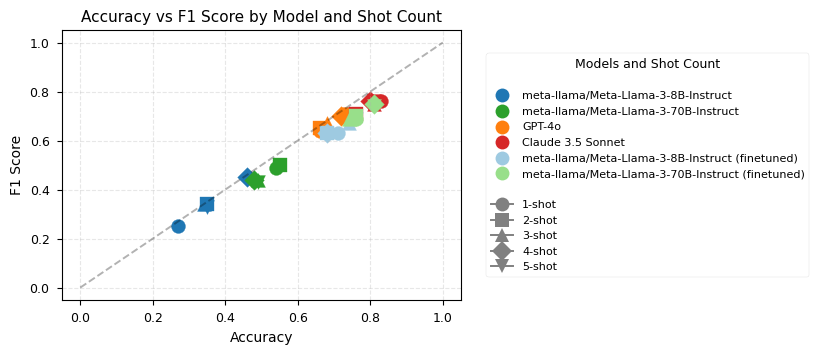

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')
plt.figure(figsize=(5.5, 3.5))

# Define different markers for different shot counts
markers = {
    '1-shot': 'o',
    '2-shot': 's',
    '3-shot': '^',
    '4-shot': 'D',
    '5-shot': 'v'
}

# Define colors for each model
colors = {
    'meta-llama/Meta-Llama-3-8B-Instruct': '#1f77b4',  # blue
    'meta-llama/Meta-Llama-3-70B-Instruct': '#2ca02c',  # green
    'GPT-4o': '#ff7f0e',  # orange
    'Claude 3.5 Sonnet': '#d62728',  # red
    'meta-llama/Meta-Llama-3-8B-Instruct (finetuned)': '#9ecae1',  # light blue
    'meta-llama/Meta-Llama-3-70B-Instruct (finetuned)': '#98df8a'  # light green
}

shots = ['1-shot', '2-shot', '3-shot', '4-shot', '5-shot']
# Plot points for each model
for model in data + finetuned_data:
    model_name = model['model']
    color = colors[model_name]
    
    for shot in shots:
        plt.scatter(model[shot]['accuracy'], 
                   model[shot]['f1'],
                   marker=markers[shot],
                   c=color,
                   s=100,  # marker size
                   )
        
# Add diagonal line where accuracy = F1
plt.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Accuracy = F1')

plt.title('Accuracy vs F1 Score by Model and Shot Count', fontsize=11)
plt.xlabel('Accuracy', fontsize=10)
plt.ylabel('F1 Score', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
# Create two legends - one for models (colors) and one for shots (markers)

# Shot legend using custom markers
model_legend = [plt.Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor=color, markersize=10,
                          label=model)
                for model, color in colors.items()]
# Shot legend (markers)
shot_legend = [plt.Line2D([0], [0], marker=marker, color='gray', 
                         markerfacecolor='gray', markersize=10,
                         label=shot)
               for shot, marker in markers.items()]


# Combine both legend handles and add titles using empty entries
all_handles = model_legend + [plt.Line2D([], [], color='none')] + shot_legend
all_labels = [handle.get_label() for handle in model_legend] + [''] + [handle.get_label() for handle in shot_legend]

# Create the legend with both sections
legend = plt.legend(handles=all_handles, labels=all_labels,
                   bbox_to_anchor=(1.05, 0.5), loc='center left',
                   title='Models and Shot Count\n',  # Double newline creates space between titles
                   title_fontsize=9,
                   fontsize=8)

# Adjust layout
plt.subplots_adjust(right=0.85)
plt.savefig("wla_results.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
plt.savefig("wla_results.pdf", dpi=300)

<Figure size 640x440 with 0 Axes>

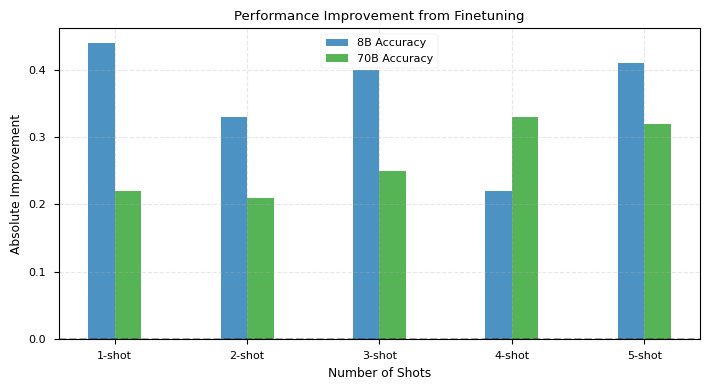

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate improvements
def get_improvements(base_model, finetuned_model):
    shots = ['1-shot', '2-shot', '3-shot', '4-shot', '5-shot']
    acc_improvements = []
    f1_improvements = []
    for shot in shots:
        acc_improvements.append(finetuned_model[shot]['accuracy'] - base_model[shot]['accuracy'])
        f1_improvements.append(finetuned_model[shot]['f1'] - base_model[shot]['f1'])
    return acc_improvements, f1_improvements

# Setup data
base_8b = next(m for m in data if '8B' in m['model'])
base_70b = next(m for m in data if '70B' in m['model'])
ft_8b = next(m for m in finetuned_data if '8B' in m['model'])
ft_70b = next(m for m in finetuned_data if '70B' in m['model'])

# Create figure
plt.figure(figsize=(7.2, 4))
x = np.arange(5)
width = 0.2

# Plot improvements
acc_imp_8b, f1_imp_8b = get_improvements(base_8b, ft_8b)
acc_imp_70b, f1_imp_70b = get_improvements(base_70b, ft_70b)

plt.bar(x - width/2, acc_imp_8b, width, label='8B Accuracy', color='#1f77b4', alpha=0.8)
plt.bar(x + width/2, acc_imp_70b, width, label='70B Accuracy', color='#2ca02c', alpha=0.8)

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('Number of Shots')
plt.ylabel('Absolute Improvement')
plt.title('Performance Improvement from Finetuning')
plt.xticks(x, ['1-shot', '2-shot', '3-shot', '4-shot', '5-shot'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

/var/folders/l_/b5wczsf55z9dmf_dzr3vw6ph0000gr/T/ipykernel_10312/2937575145.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "--o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(shots, accuracies, style, label=label, marker='o')
/var/folders/l_/b5wczsf55z9dmf_dzr3vw6ph0000gr/T/ipykernel_10312/2937575145.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(shots, accuracies, style, label=label, marker='o')
/var/folders/l_/b5wczsf55z9dmf_dzr3vw6ph0000gr/T/ipykernel_10312/2937575145.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "--s" (-> marker='s'). The keyword argument will take precedence.
  plt.plot(shots, accuracies, style, label=label, marker='o')
/var/folders/l_/b5wczsf55z9dmf_dzr3vw6ph0000gr/T/ipykernel_10312/2937575145.py:7: User

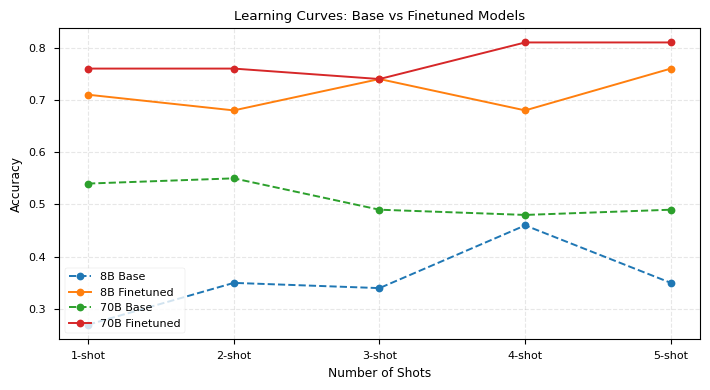

In [4]:
plt.figure(figsize=(7.2, 4))

# Plot learning curves for both base and finetuned models
def plot_learning_curve(model, style, label):
    shots = ['1-shot', '2-shot', '3-shot', '4-shot', '5-shot']
    accuracies = [model[shot]['accuracy'] for shot in shots]
    plt.plot(shots, accuracies, style, label=label, marker='o')

plot_learning_curve(base_8b, '--o', '8B Base')
plot_learning_curve(ft_8b, '-o', '8B Finetuned')
plot_learning_curve(base_70b, '--s', '70B Base')
plot_learning_curve(ft_70b, '-s', '70B Finetuned')

plt.xlabel('Number of Shots')
plt.ylabel('Accuracy')
plt.title('Learning Curves: Base vs Finetuned Models')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()

/var/folders/l_/b5wczsf55z9dmf_dzr3vw6ph0000gr/T/ipykernel_54240/2262540571.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, labels=['8B Base', '8B Finetuned', '70B Base', '70B Finetuned'],


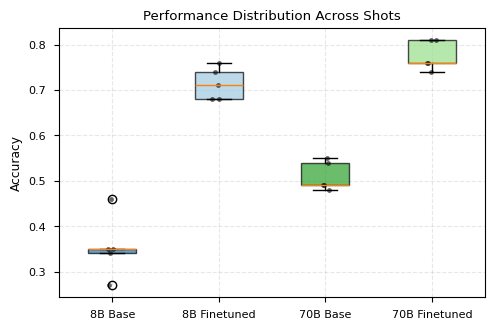

In [13]:
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.figure(figsize=(5.5, 3.5))

def get_performance_stats(model):
    return [model[shot]['accuracy'] for shot in ['1-shot', '2-shot', '3-shot', '4-shot', '5-shot']]

base_8b = next(m for m in data if '8B' in m['model'])
base_70b = next(m for m in data if '70B' in m['model'])
ft_8b = next(m for m in finetuned_data if '8B' in m['model'])
ft_70b = next(m for m in finetuned_data if '70B' in m['model'])

# Get data for each model
data_to_plot = [
    get_performance_stats(base_8b),
    get_performance_stats(ft_8b),
    get_performance_stats(base_70b),
    get_performance_stats(ft_70b)
]

# Create box plot
bp = plt.boxplot(data_to_plot, labels=['8B Base', '8B Finetuned', '70B Base', '70B Finetuned'],
                 patch_artist=True)  # Enable filling of boxes

# Color the boxes
colors = ['#1f77b4', '#9ecae1', '#2ca02c', '#98df8a']  # Using our previous color scheme
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Overlay the actual data points
for i, data in enumerate(data_to_plot):
    # Add some random x-jitter to better see the points
    x = np.random.normal(i + 1, 0.04, size=len(data))
    plt.plot(x, data, 'k.', alpha=0.6, markersize=7)

plt.ylabel('Accuracy')
plt.title('Performance Distribution Across Shots')
plt.grid(True, linestyle='--', alpha=0.3)

# legend_elements = [
#     Line2D([0], [0], color='black', marker='_', linestyle='none',
#            markersize=15, label='Median', markeredgewidth=2),
#     Patch(facecolor='gray', alpha=0.7, label='IQR (25-75th percentile)'),
#     Line2D([0], [0], color='black', marker='.', linestyle='none',
#            markersize=10, label='Individual shot performance'),
#     Line2D([0], [0], color='black', linestyle='-', label='Whiskers (1.5×IQR)')
# ]

# # Add model colors to legend
# legend_elements.extend([
#     Patch(facecolor=color, alpha=0.7, label=label) for color, label in [
#         ('#1f77b4', '8B Base'),
#         ('#9ecae1', '8B Finetuned'),
#         ('#2ca02c', '70B Base'),
#         ('#98df8a', '70B Finetuned')
#     ]
# ])

# plt.legend(handles=legend_elements, 
#           loc='center left', 
#           bbox_to_anchor=(1.05, 0.5),
#           title='Box Plot Elements\n\nModels')

plt.savefig("wla_results2.pdf", dpi=300, bbox_inches='tight')
plt.show()